In [1]:
import pandas as pd
import numpy as np


In [2]:

wine = pd.read_csv('wine.csv', names = ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])

In [3]:
wine.head()

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cultivator,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alchol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity_of_Ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Falvanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [5]:
wine.shape

(178, 14)

In [6]:
X = wine.drop('Cultivator',axis=1)
y = wine['Cultivator']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
# Fit only to the training data
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
#Multi-layer Perceptron classifier.

from sklearn.neural_network import MLPClassifier

In [12]:
# mlp = MLPClassifier(hidden_layer_sizes=(8,6), max_iter=2000, activation = 'relu', random_state=10)

In [43]:
mlp = MLPClassifier(hidden_layer_sizes=(8,8), max_iter=2000, activation = 'relu', random_state=10)

In [44]:
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)

In [45]:
from sklearn.metrics import classification_report,confusion_matrix
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))
print(confusion_matrix(y_test,y_pred))

1.0
1.0
[[19  0  0]
 [ 0 22  0]
 [ 0  0 13]]


In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        13

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



[(2, 1), 0.3951612903225806, 0.4074074074074074]

[(3, 2), 0.9919354838709677, 0.9259259259259259]

[(4, 3), 1.0, 0.9444444444444444]

[(5, 4), 1.0, 1.0]

[(6, 5), 1.0, 0.9629629629629629]

[(7, 6), 1.0, 0.9629629629629629]

[(8, 7), 1.0, 1.0]

[(9, 8), 0.9919354838709677, 0.9814814814814815]

[(10, 9), 1.0, 0.9814814814814815]

[(11, 10), 0.9919354838709677, 0.9444444444444444]



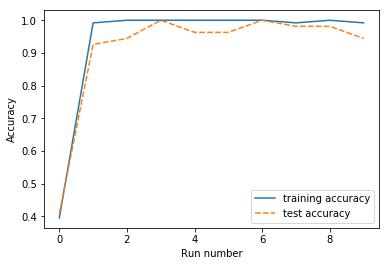

In [66]:
import matplotlib.pyplot as plt

training_accuracy = []
test_accuracy = []
results =[]
neuron_range = range(2, 12)
for neurons in neuron_range:
    # define Hidden layers
#     hidden_layers = (neurons)
    hidden_layers = (neurons, neurons-1)
    
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layers, max_iter = 2000 , activation = 'relu', random_state=0)
    mlp.fit(X_train, y_train)
    # Train and Test scores
    training_accuracy.append(mlp.score(X_train, y_train))
    test_accuracy.append(mlp.score(X_test, y_test))
    # capture results
    results.append(hidden_layers)
    results.append(mlp.score(X_train, y_train))
    results.append(mlp.score(X_test, y_test))
    #print("Hidden Layer", hidden_layers)
    print(results)
    print()
    results =[]
plt.plot( training_accuracy, label="training accuracy")
plt.plot(test_accuracy, '--', label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Run number")
plt.legend()
plt.show()
